In [1]:
import pandas as pd
file_path = r'data'
data = pd.read_csv(file_path)
data.head()

,Tem.,Cs/Pb,Cs/Br,Pb/Br,Raa,Caa,Time,Conc.,Polarity,Labels
0,120,1.00,0.33,0.33,0.00,0.00,180.00,2.000,7.2,0
1,25,1.00,0.33,0.33,1.00,0.17,8.00,0.006,0.1,0
2,25,4.33,2.17,0.50,106.00,0.33,10.00,0.010,0.1,0
3,80,2.30,1.15,0.50,0.63,0.33,0.50,0.040,0.0,0
4,160,0.30,0.15,0.50,1.06,0.16,0.17,0.040,0.0,1


Distance correlation matrix has been saved to C:\Users\Qi Wang\OneDrive - unige.it\Desktop\ML-CsPbBr\distance_correlation_matrix.xlsx


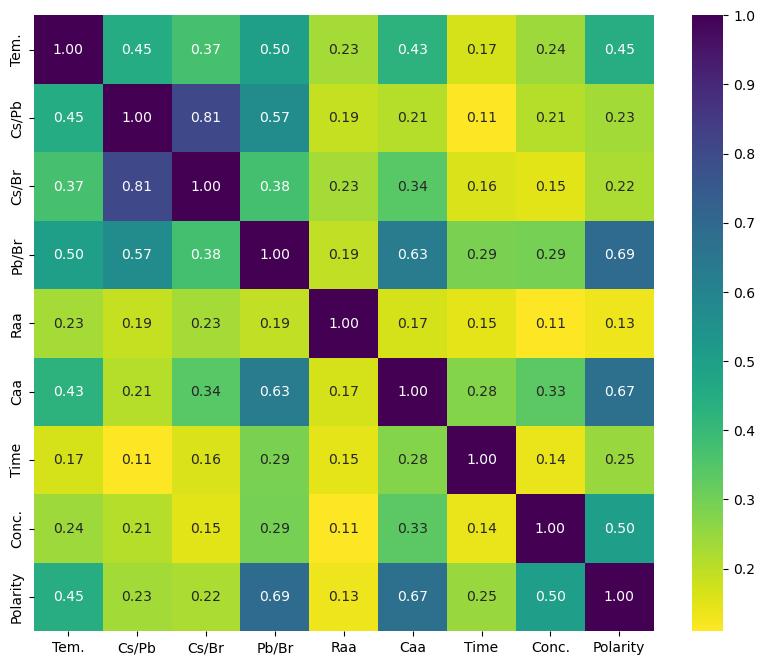

In [2]:
import numpy as np
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt

def distance_covariance(X, Y):
    n = X.shape[0]
    A = distance.squareform(distance.pdist(X, 'euclidean'))
    B = distance.squareform(distance.pdist(Y, 'euclidean'))
    A_mean_row = np.mean(A, axis=1, keepdims=True)
    A_mean_col = np.mean(A, axis=0, keepdims=True)
    A_mean_total = A.mean()
    B_mean_row = np.mean(B, axis=1, keepdims=True)
    B_mean_col = np.mean(B, axis=0, keepdims=True)
    B_mean_total = B.mean()
    A_centered = A - A_mean_row - A_mean_col + A_mean_total
    B_centered = B - B_mean_row - B_mean_col + B_mean_total
    dcov = np.sqrt(np.sum(A_centered * B_centered) / (n * n))
    return dcov

def distance_variance(X):
    return distance_covariance(X, X)

# Function to calculate distance correlation
def distance_correlation(X, Y):
    dcovXY = distance_covariance(X, Y)
    dvarX = distance_variance(X)
    dvarY = distance_variance(Y)
    if dvarX > 0 and dvarY > 0:
        return dcovXY / np.sqrt(dvarX * dvarY)
    else:
        return 0.0  # Handle zero variance


data = pd.read_csv(file_path)

features = data.iloc[:, :9]

dcor_matrix = pd.DataFrame(index=features.columns, columns=features.columns)

for i in range(features.shape[1]):
    for j in range(i + 1, features.shape[1]):
        X = features.iloc[:, i].values.reshape(-1, 1)
        Y = features.iloc[:, j].values.reshape(-1, 1)
        dcor = distance_correlation(X, Y)
        dcor_matrix.loc[features.columns[i], features.columns[j]] = dcor
        dcor_matrix.loc[features.columns[j], features.columns[i]] = dcor

np.fill_diagonal(dcor_matrix.values, 1)

dcor_matrix = dcor_matrix.astype(float).fillna(0)

output_path = 'data'
dcor_matrix.to_excel(output_path)
print(f"Distance correlation matrix has been saved to {output_path}")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dcor_matrix, annot=True, cmap='viridis_r', fmt=".2f")
plt.show()

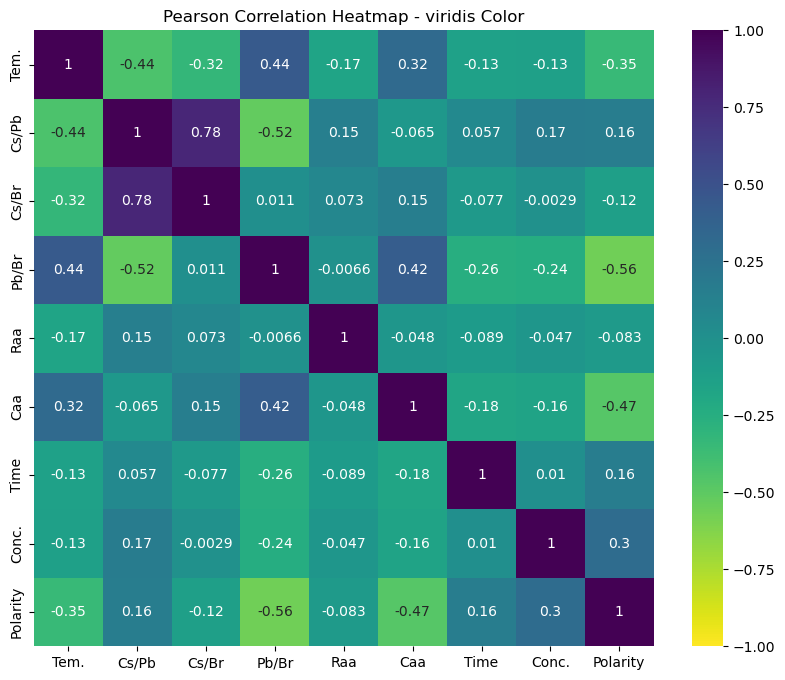

In [3]:
#Pearson correlation coefficient

feature_data = data.iloc[:, 0:9]

corr_matrix = feature_data.corr(method='pearson')

corr_df = pd.DataFrame(corr_matrix, index=feature_data.columns, columns=feature_data.columns)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='viridis_r', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap - viridis Color')
plt.show()

output_path = 'pearson correlation_matrix.csv'

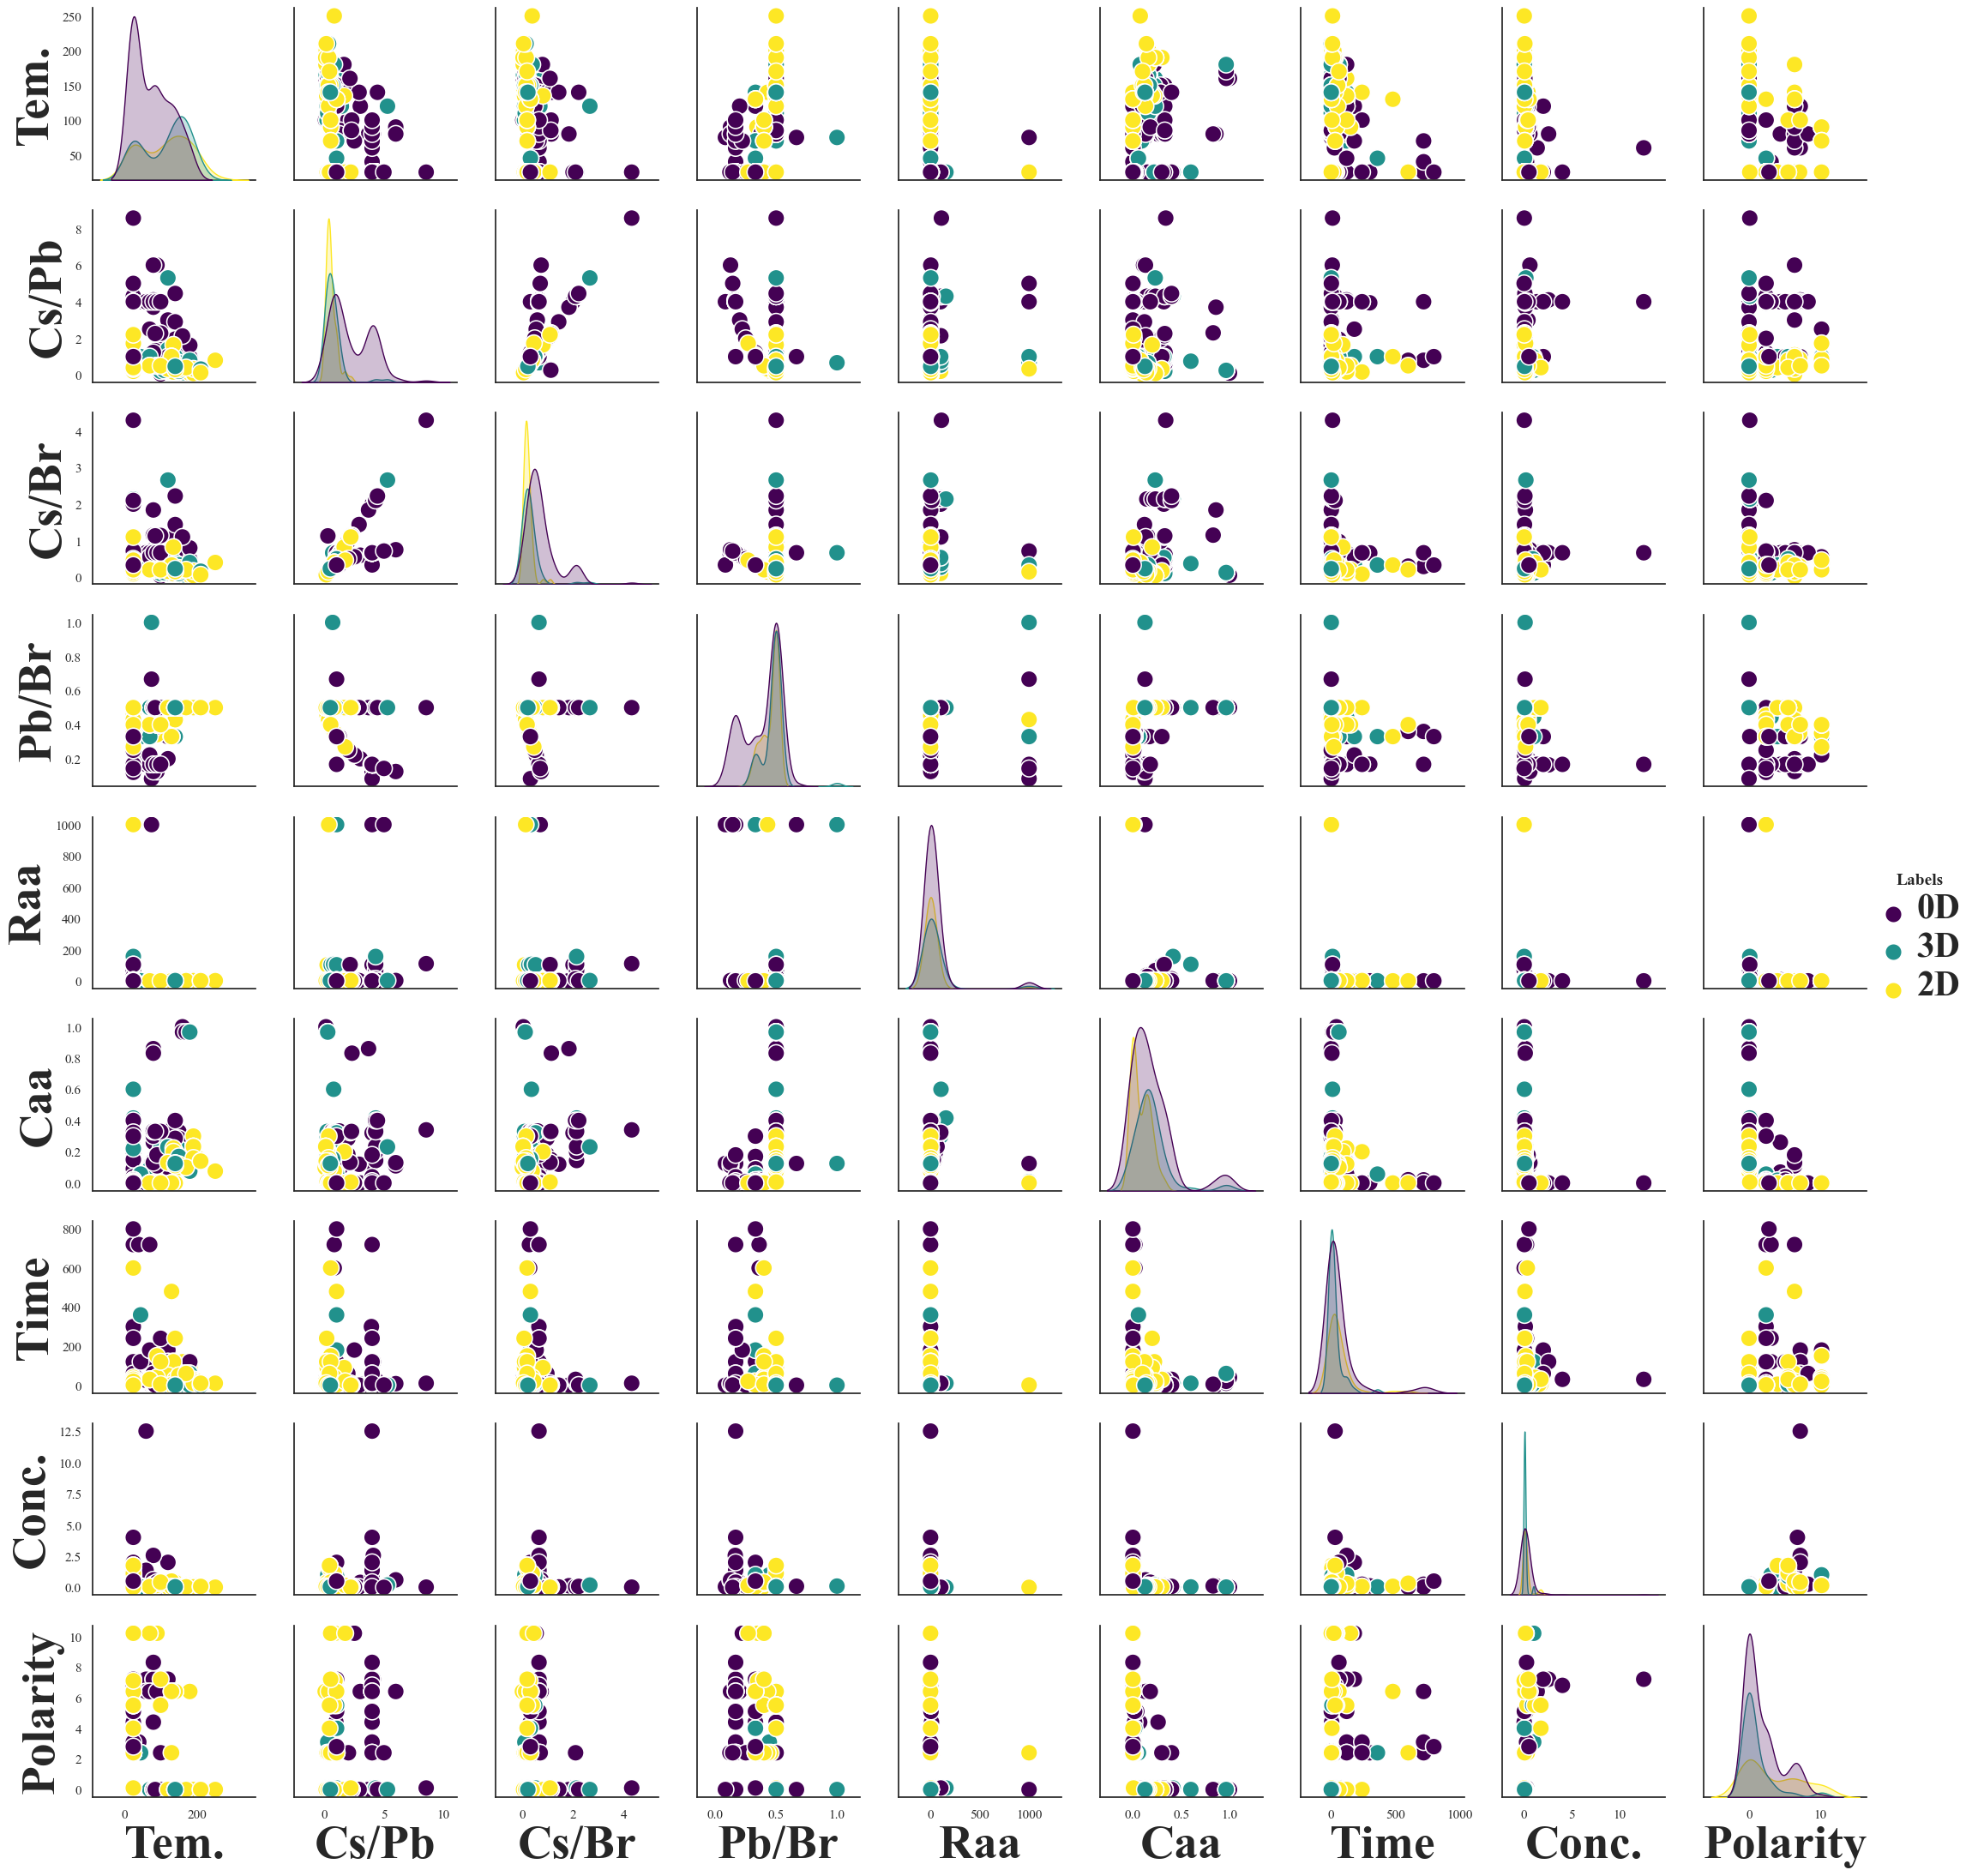

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'data'
data = pd.read_csv(file_path)

columns_to_plot = ['Tem.', 'Cs/Pb', 'Cs/Br', 'Pb/Br', 'Raa', 'Caa', 'Time', 'Conc.', 'Polarity']
hue_column = 'Labels'

sns.set(style="white")

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 50

pairplot = sns.pairplot(data[columns_to_plot + [hue_column]], hue=hue_column, palette="viridis", plot_kws={'s': 200})

for ax in pairplot.axes.flatten():
    ax.set_facecolor('white')
    ax.xaxis.label.set_size(40)
    ax.yaxis.label.set_size(40)
    ax.xaxis.label.set_weight('bold')
    ax.yaxis.label.set_weight('bold')

legend = pairplot._legend
legend.set_title(hue_column, prop={'size': 14, 'weight': 'bold'})

new_labels = ['0D', '3D', '2D']
for text, new_label in zip(legend.get_texts(), new_labels):
    text.set_text(new_label)
    text.set_fontsize(30)
    text.set_weight('bold')
    
plt.show()

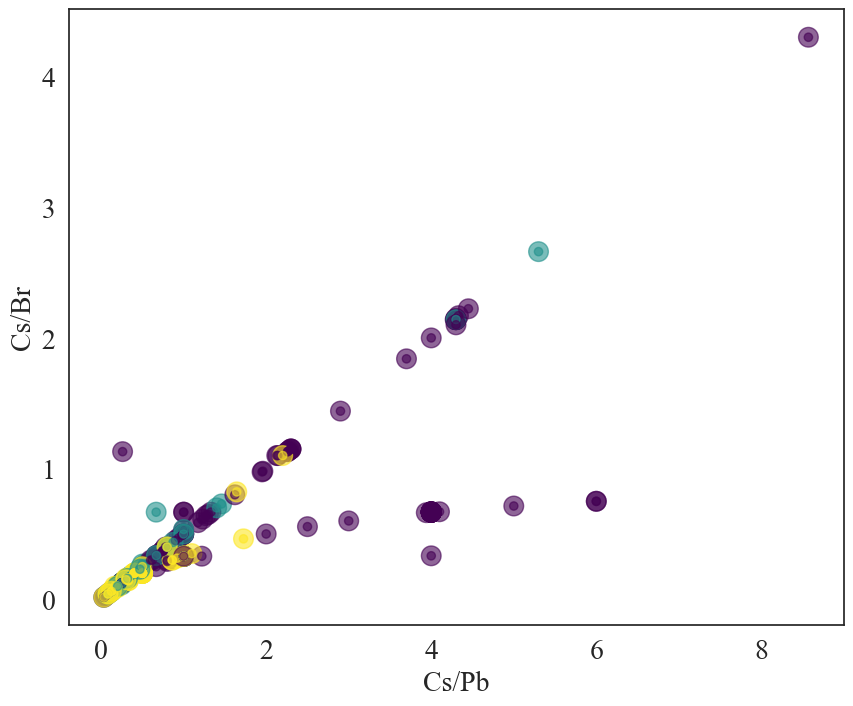

In [5]:
x_feature = data.columns[1]
y_feature = data.columns[2]
labels = data.iloc[:, -1]


cmap = 'viridis'  


plt.figure(figsize=(10, 8))

scatter = plt.scatter(data[x_feature], data[y_feature], c=labels, cmap=cmap, s=200, alpha=0.6)

scatter = plt.scatter(data[x_feature], data[y_feature], c=labels, cmap=cmap, alpha=0.6)

plt.xlabel(x_feature, fontsize=20)
plt.ylabel(y_feature, fontsize=20)
ax.xaxis.label.set_weight('bold')
ax.yaxis.label.set_weight('bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [26]:
import xgboost as xgb
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, log_loss

file_path = r'data'
data = pd.read_excel(file_path)

data = data.sample(frac=1, random_state=42)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

def eval_accuracy(preds, dtrain):
    labels = dtrain.get_label()
    preds = preds.reshape(-1, len(set(y_encoded)))
    predicted_classes = np.argmax(preds, axis=1)
    accuracy = np.sum(predicted_classes == labels) / len(labels)
    loss = log_loss(labels, preds, labels=np.unique(labels))
    return [('accuracy', accuracy), ('mlogloss', loss)]

params = {
    'max_depth': 6,#6, 3
    'eta': 0.4,#0.4, 0.3
    'objective': 'multi:softprob',  # Changed to softprob for probability output
    'num_class': len(set(y_encoded))
}

evals = [(dtrain, 'train'), (dtest, 'eval')]
num_boost_round = 100 #20, 27
bst = xgb.train(params, 
                dtrain, 
                num_boost_round, 
                evals=evals, 
                early_stopping_rounds= 20,#30, 26
                feval=eval_accuracy, 
                verbose_eval=True)

preds = bst.predict(dtest)
preds = preds.reshape(-1, len(set(y_encoded)))
predicted_classes = np.argmax(preds, axis=1)
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

[0]	train-mlogloss:0.56773	train-accuracy:0.88636	eval-mlogloss:0.77738	eval-accuracy:0.70454
[1]	train-mlogloss:0.27918	train-accuracy:0.92614	eval-mlogloss:1.59265	eval-accuracy:0.72727
[2]	train-mlogloss:0.26881	train-accuracy:0.93750	eval-mlogloss:1.89193	eval-accuracy:0.77273
[3]	train-mlogloss:0.20109	train-accuracy:0.94318	eval-mlogloss:1.75672	eval-accuracy:0.77273
[4]	train-mlogloss:0.18277	train-accuracy:0.95454	eval-mlogloss:1.72829	eval-accuracy:0.81818
[5]	train-mlogloss:0.16302	train-accuracy:0.95454	eval-mlogloss:1.73136	eval-accuracy:0.81818
[6]	train-mlogloss:0.14129	train-accuracy:0.97727	eval-mlogloss:1.72784	eval-accuracy:0.81818
[7]	train-mlogloss:0.13731	train-accuracy:0.97727	eval-mlogloss:1.72649	eval-accuracy:0.81818
[8]	train-mlogloss:0.12086	train-accuracy:0.98864	eval-mlogloss:1.71144	eval-accuracy:0.81818
[9]	train-mlogloss:0.10481	train-accuracy:0.99432	eval-mlogloss:1.41761	eval-accuracy:0.84091
[10]	train-mlogloss:0.09519	train-accuracy:0.99432	eval-mlog

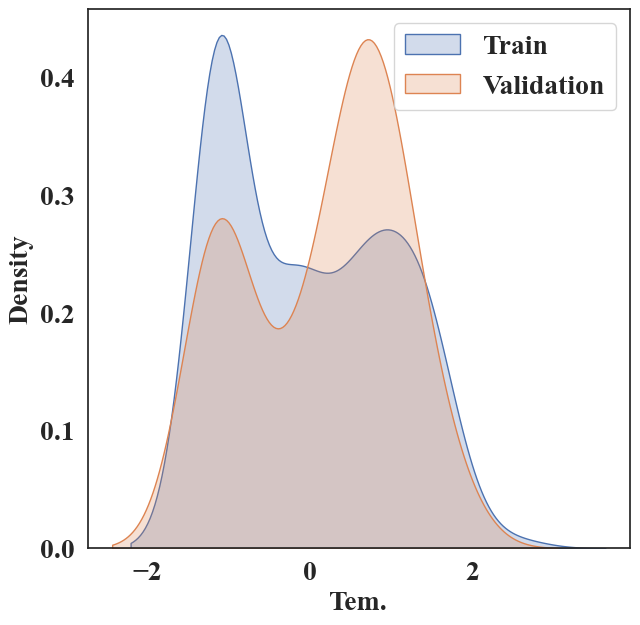

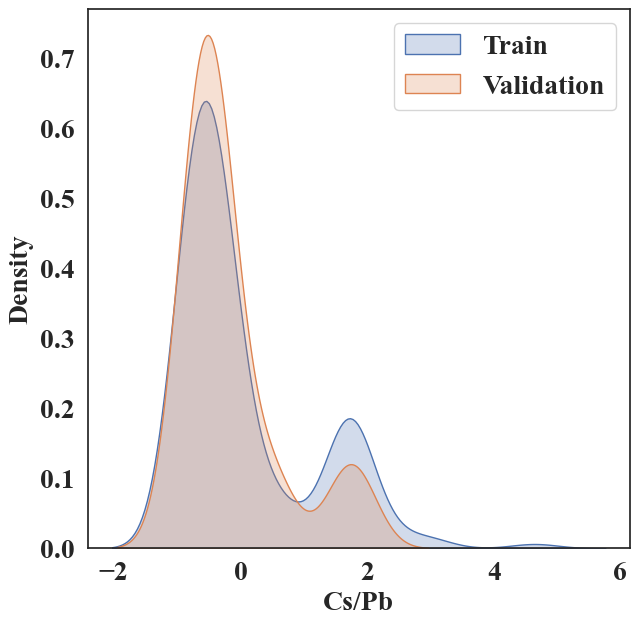

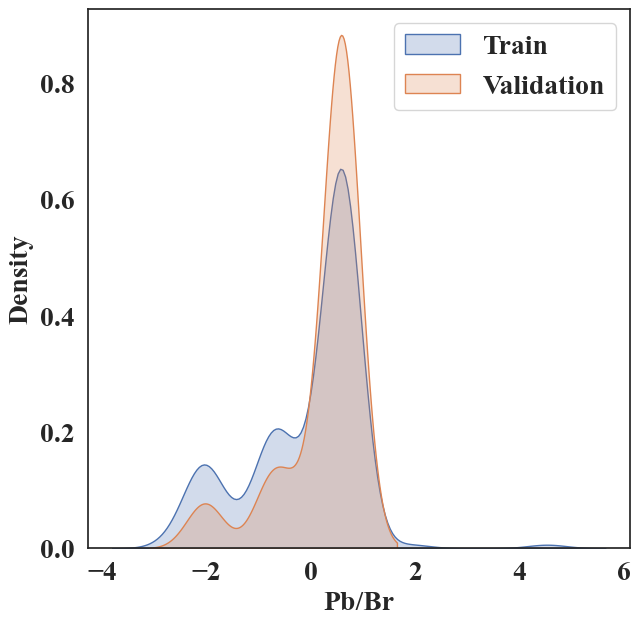

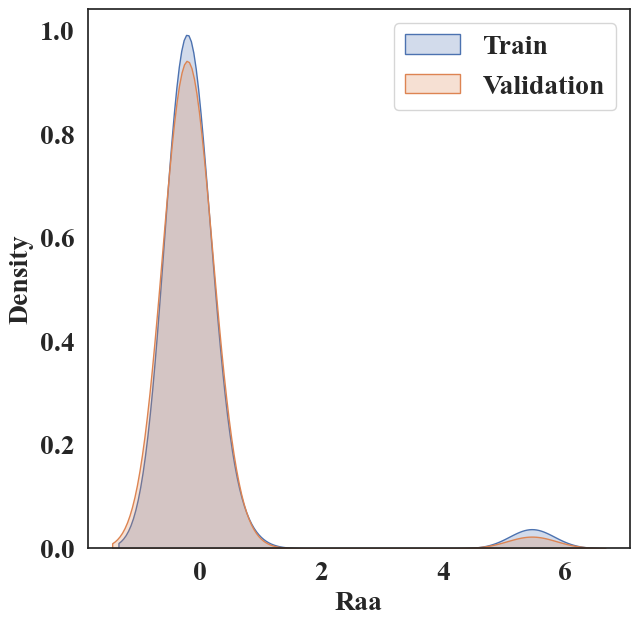

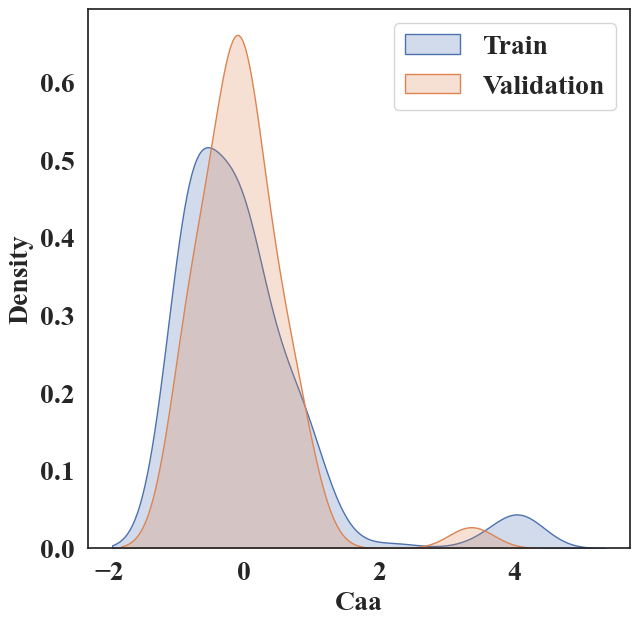

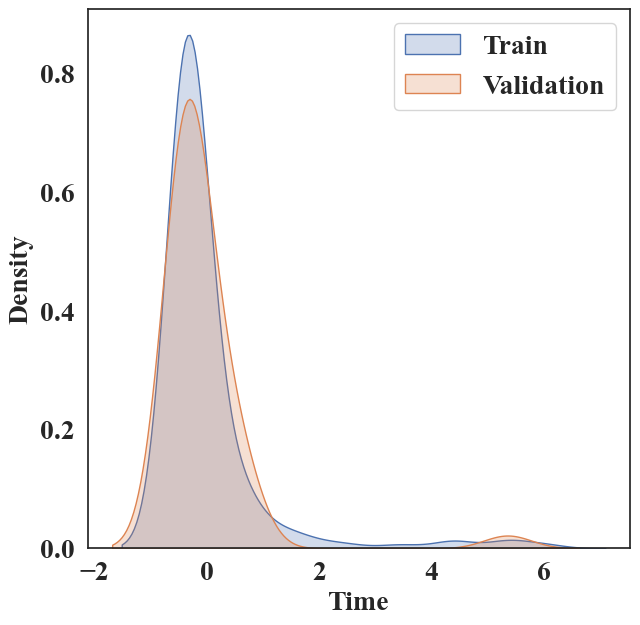

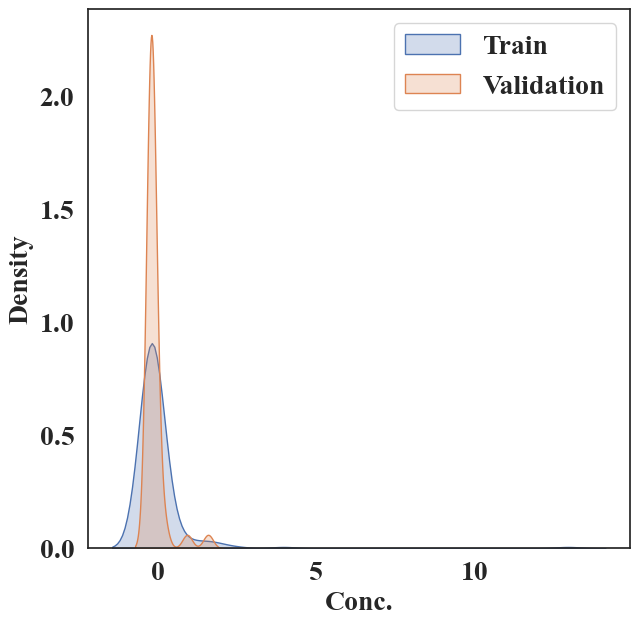

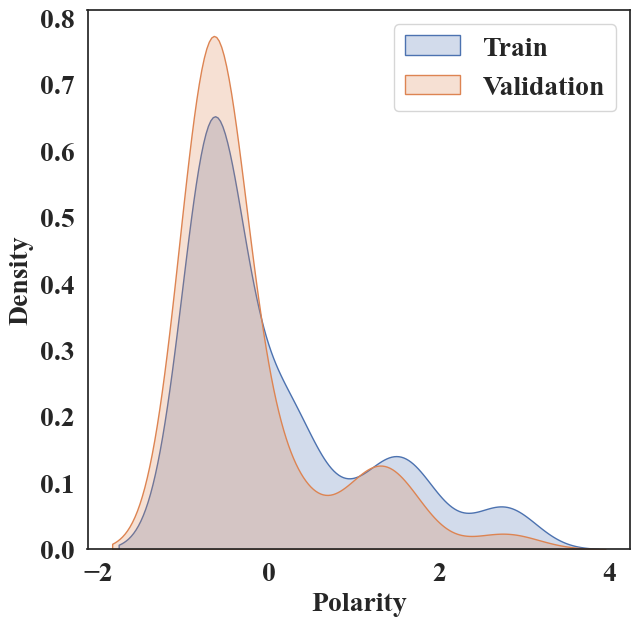

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

columns = data.columns[:-1]  
X_train_df = pd.DataFrame(X_train, columns=columns)
X_test_df = pd.DataFrame(X_test, columns=columns)

for col in columns:
    plt.figure(figsize=(7, 7))
    sns.kdeplot(X_train_df[col], label='Train', fill=True)
    sns.kdeplot(X_test_df[col], label='Validation', fill=True)
    plt.xlabel(col, fontsize=20, fontweight='bold')  
    plt.ylabel('Density', fontsize=20, fontweight='bold')  
    
    
    legend_font_props = FontProperties(size=20, weight='bold')
    plt.legend(prop=legend_font_props)  

    
    plt.tick_params(axis='both', which='major', labelsize=20)

  
    [label.set_fontweight('bold') for label in plt.gca().get_xticklabels()]
    [label.set_fontweight('bold') for label in plt.gca().get_yticklabels()]

    plt.show() 

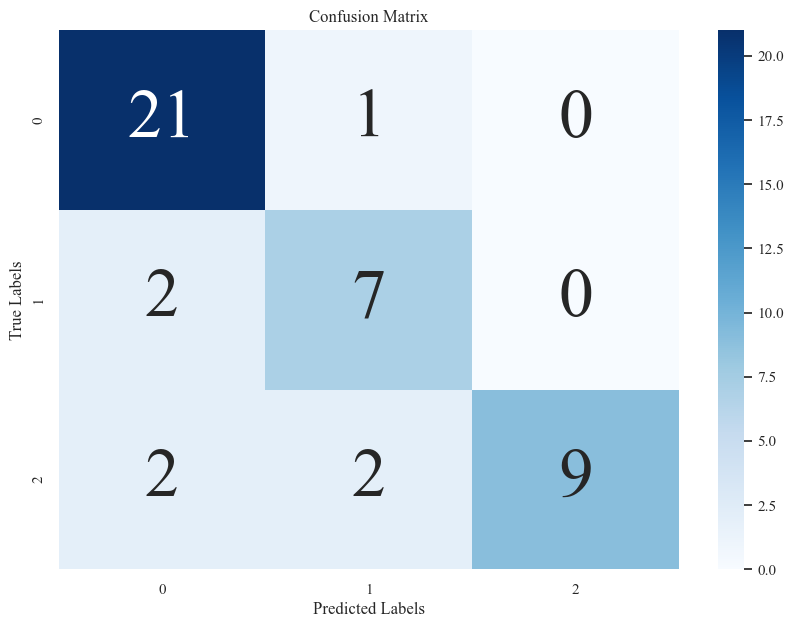

Accuracy: 0.8409


In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

preds = bst.predict(dtest)
preds = preds.reshape(-1, len(set(y_encoded)))
predicted_classes = np.argmax(preds, axis=1)
accuracy = accuracy_score(y_test, predicted_classes)

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f'Accuracy: {accuracy:.4f}')

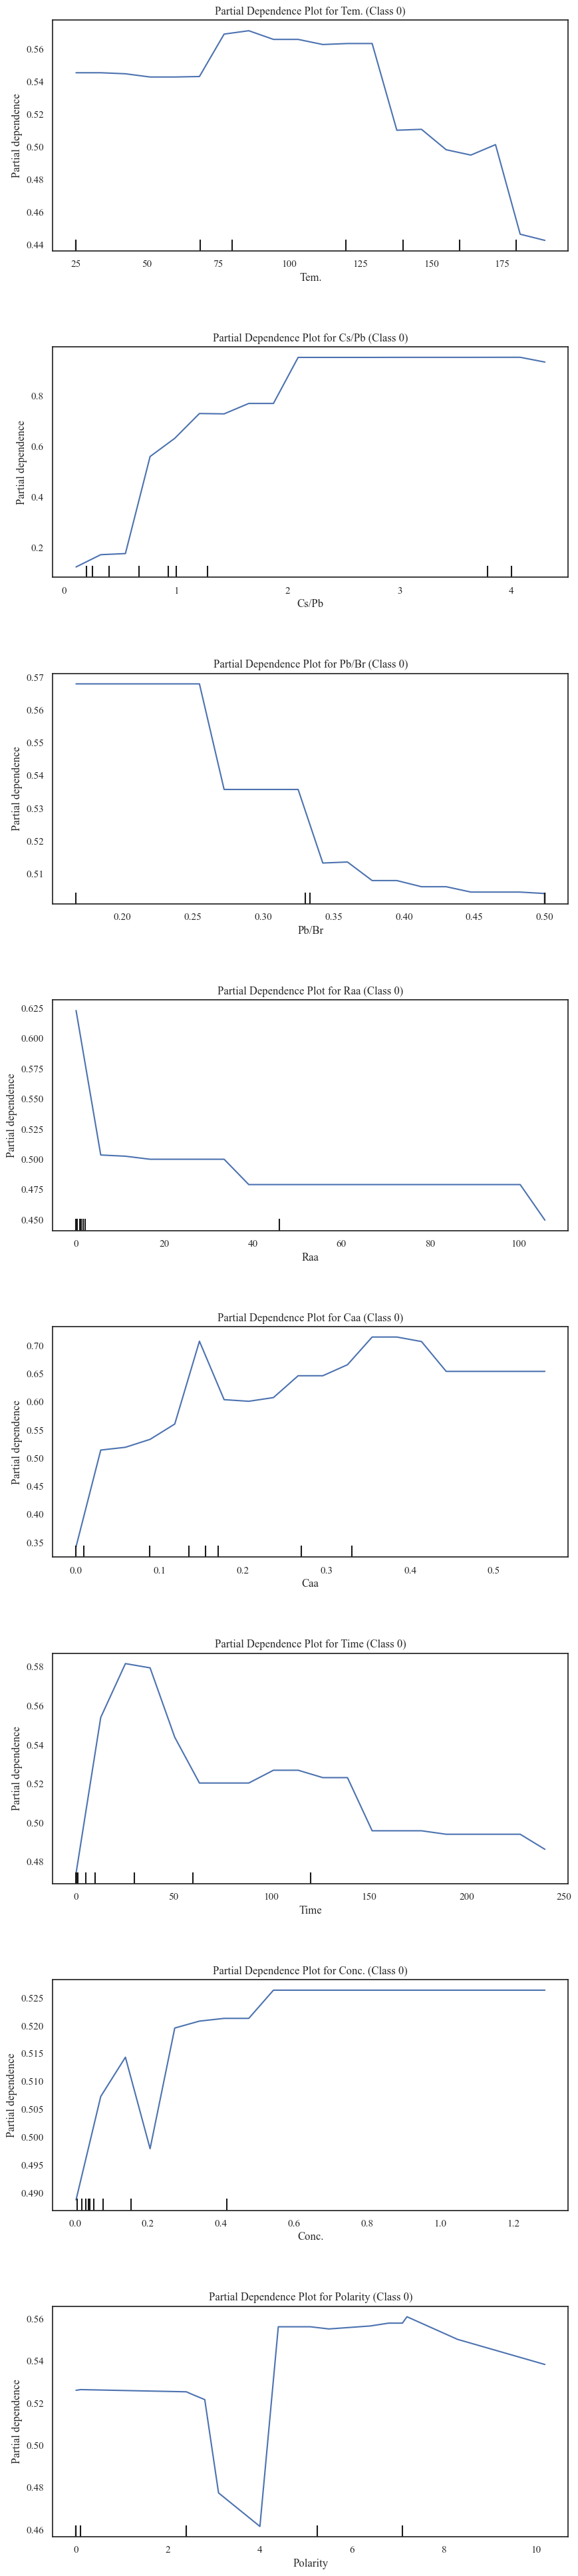

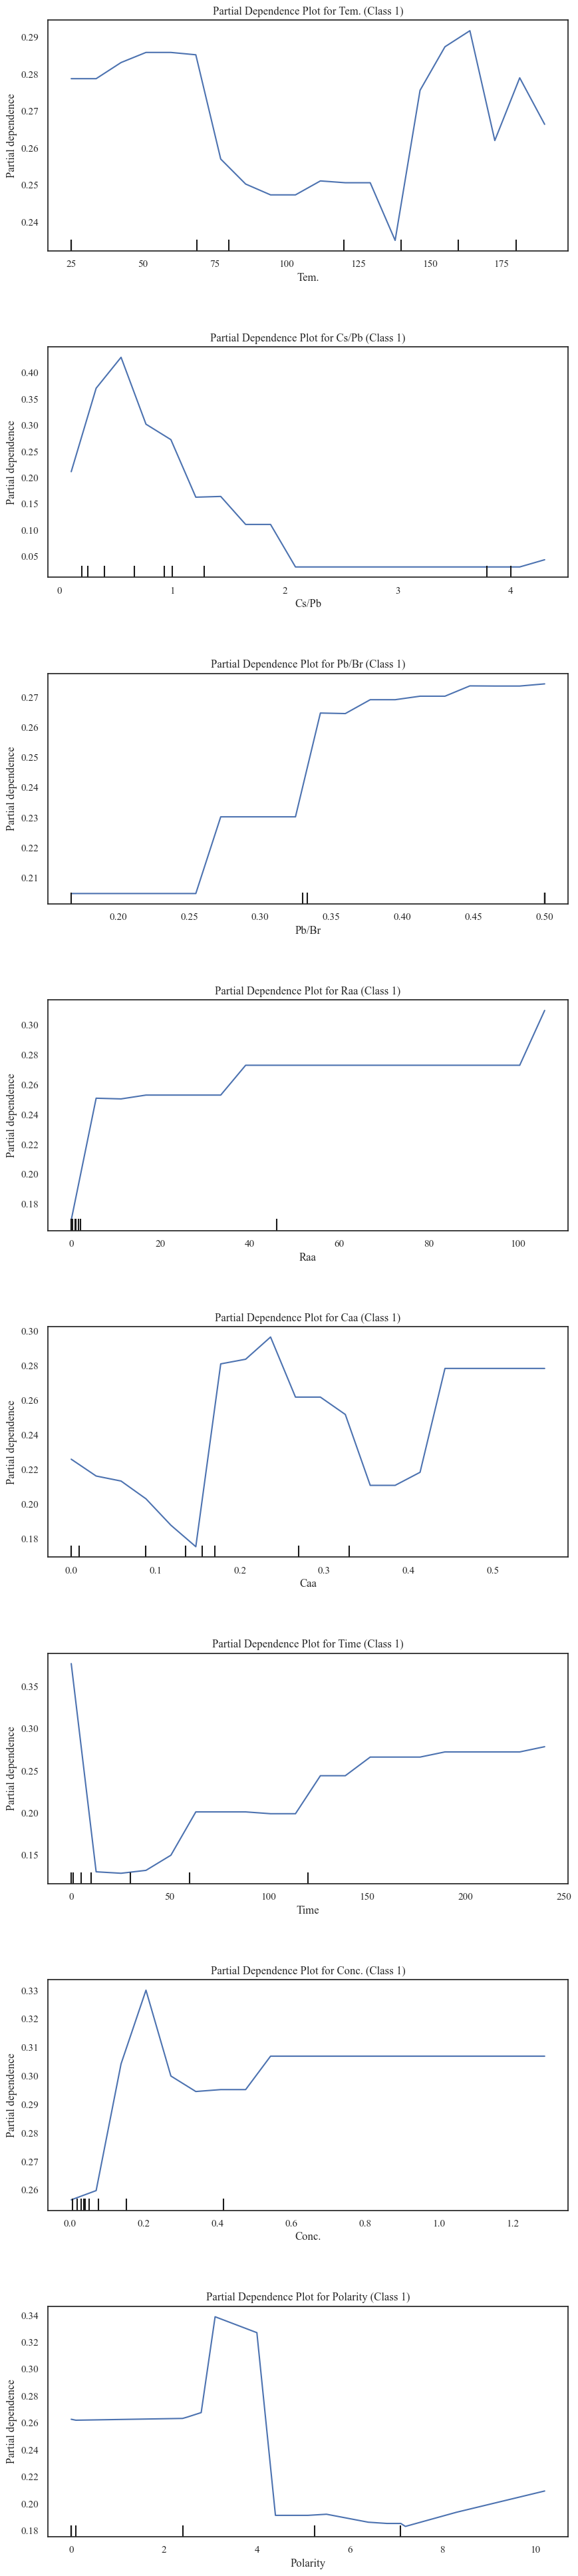

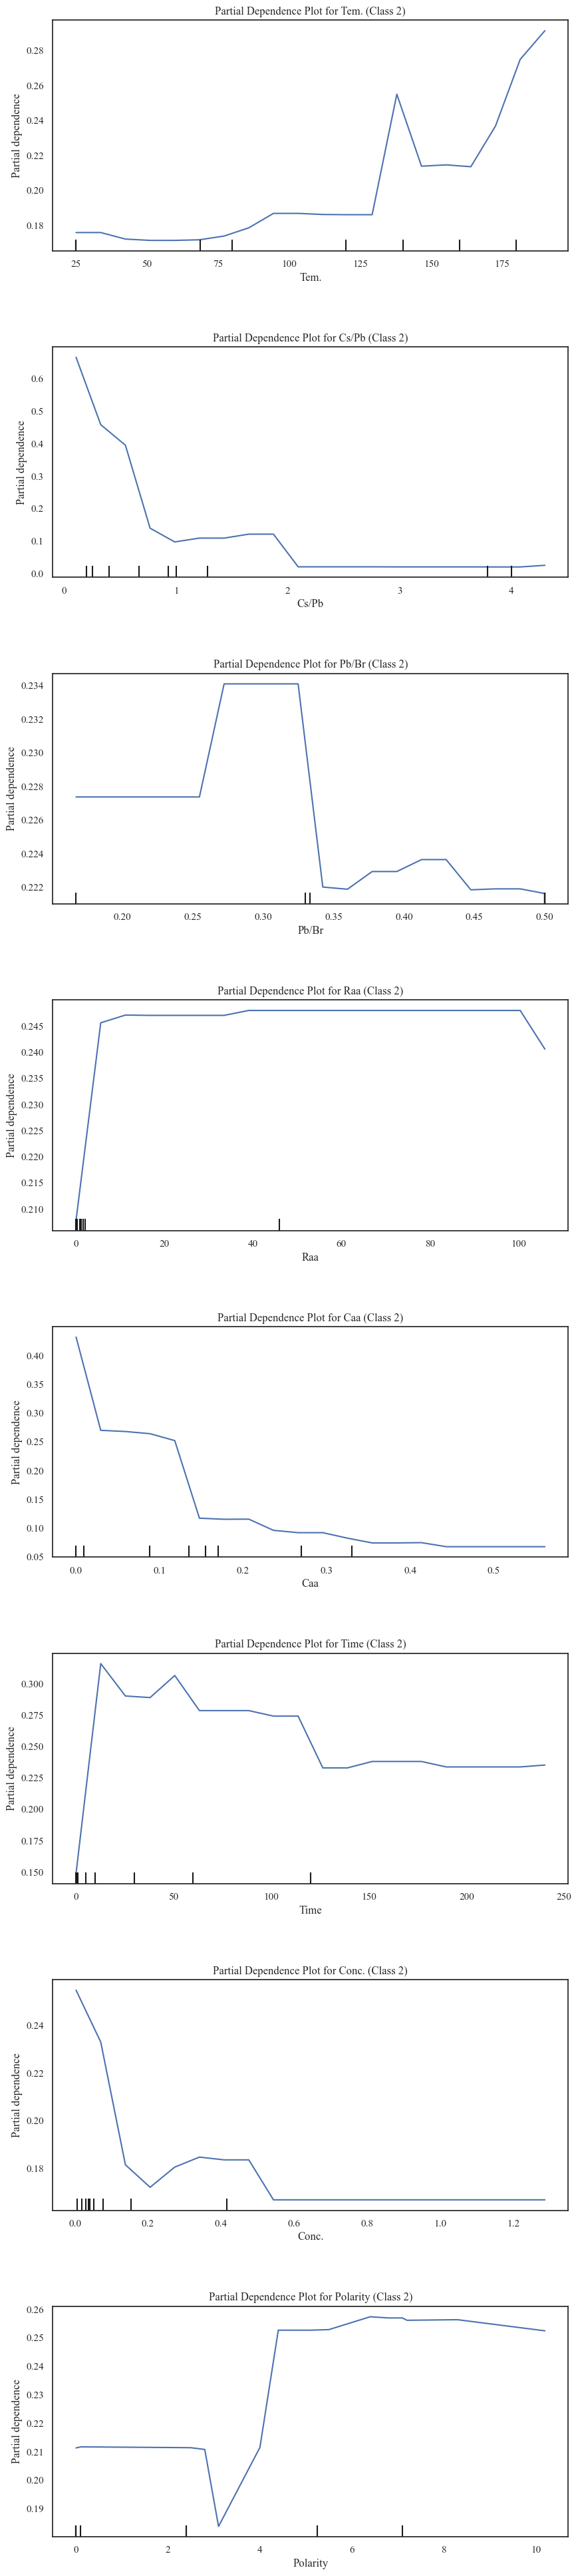

In [29]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


X = data.drop('Labels', axis=1)
y = data['Labels']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


features = ['Tem.', 'Cs/Pb','Pb/Br', 'Raa','Caa','Time','Conc.','Polarity']
feature_names = features


num_classes = model.n_classes_


for class_index in range(num_classes):
    fig, axs = plt.subplots(len(features), figsize=(10, 5 * len(features)), sharex='col')

    
    for i, feature in enumerate(features):
        display = PartialDependenceDisplay.from_estimator(
            model,
            X_train,
            features=[feature],
            feature_names=feature_names,
            ax=axs[i],
            grid_resolution=20,
            target=class_index  
        )
        axs[i].set_title(f'Partial Dependence Plot for {feature} (Class {class_index})')

    plt.tight_layout()
    plt.show()

In [88]:
# Get feature importance
importance = bst.get_score(importance_type='weight')

# Summarize feature importance in percentages
total_importance = sum(importance.values())
importance_percent = {feature: (score / total_importance) * 100 for feature, score in importance.items()}

# Match feature names from the dataset
feature_names = data.columns[:-1]  # Assuming the last column is the label
importance_percent_named = {feature_names[int(feature[1:])]: importance_percent.get(feature, 0) for feature in importance_percent}

# Sort and print feature importance
sorted_importance = sorted(importance_percent_named.items(), key=lambda item: item[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.2f}%")

Feature Importance:
Cs/Pb: 29.23%
Time: 23.08%
Caa: 16.92%
Raa: 12.31%
Tem. : 10.77%
Conc.: 4.62%
Polarity: 3.08%


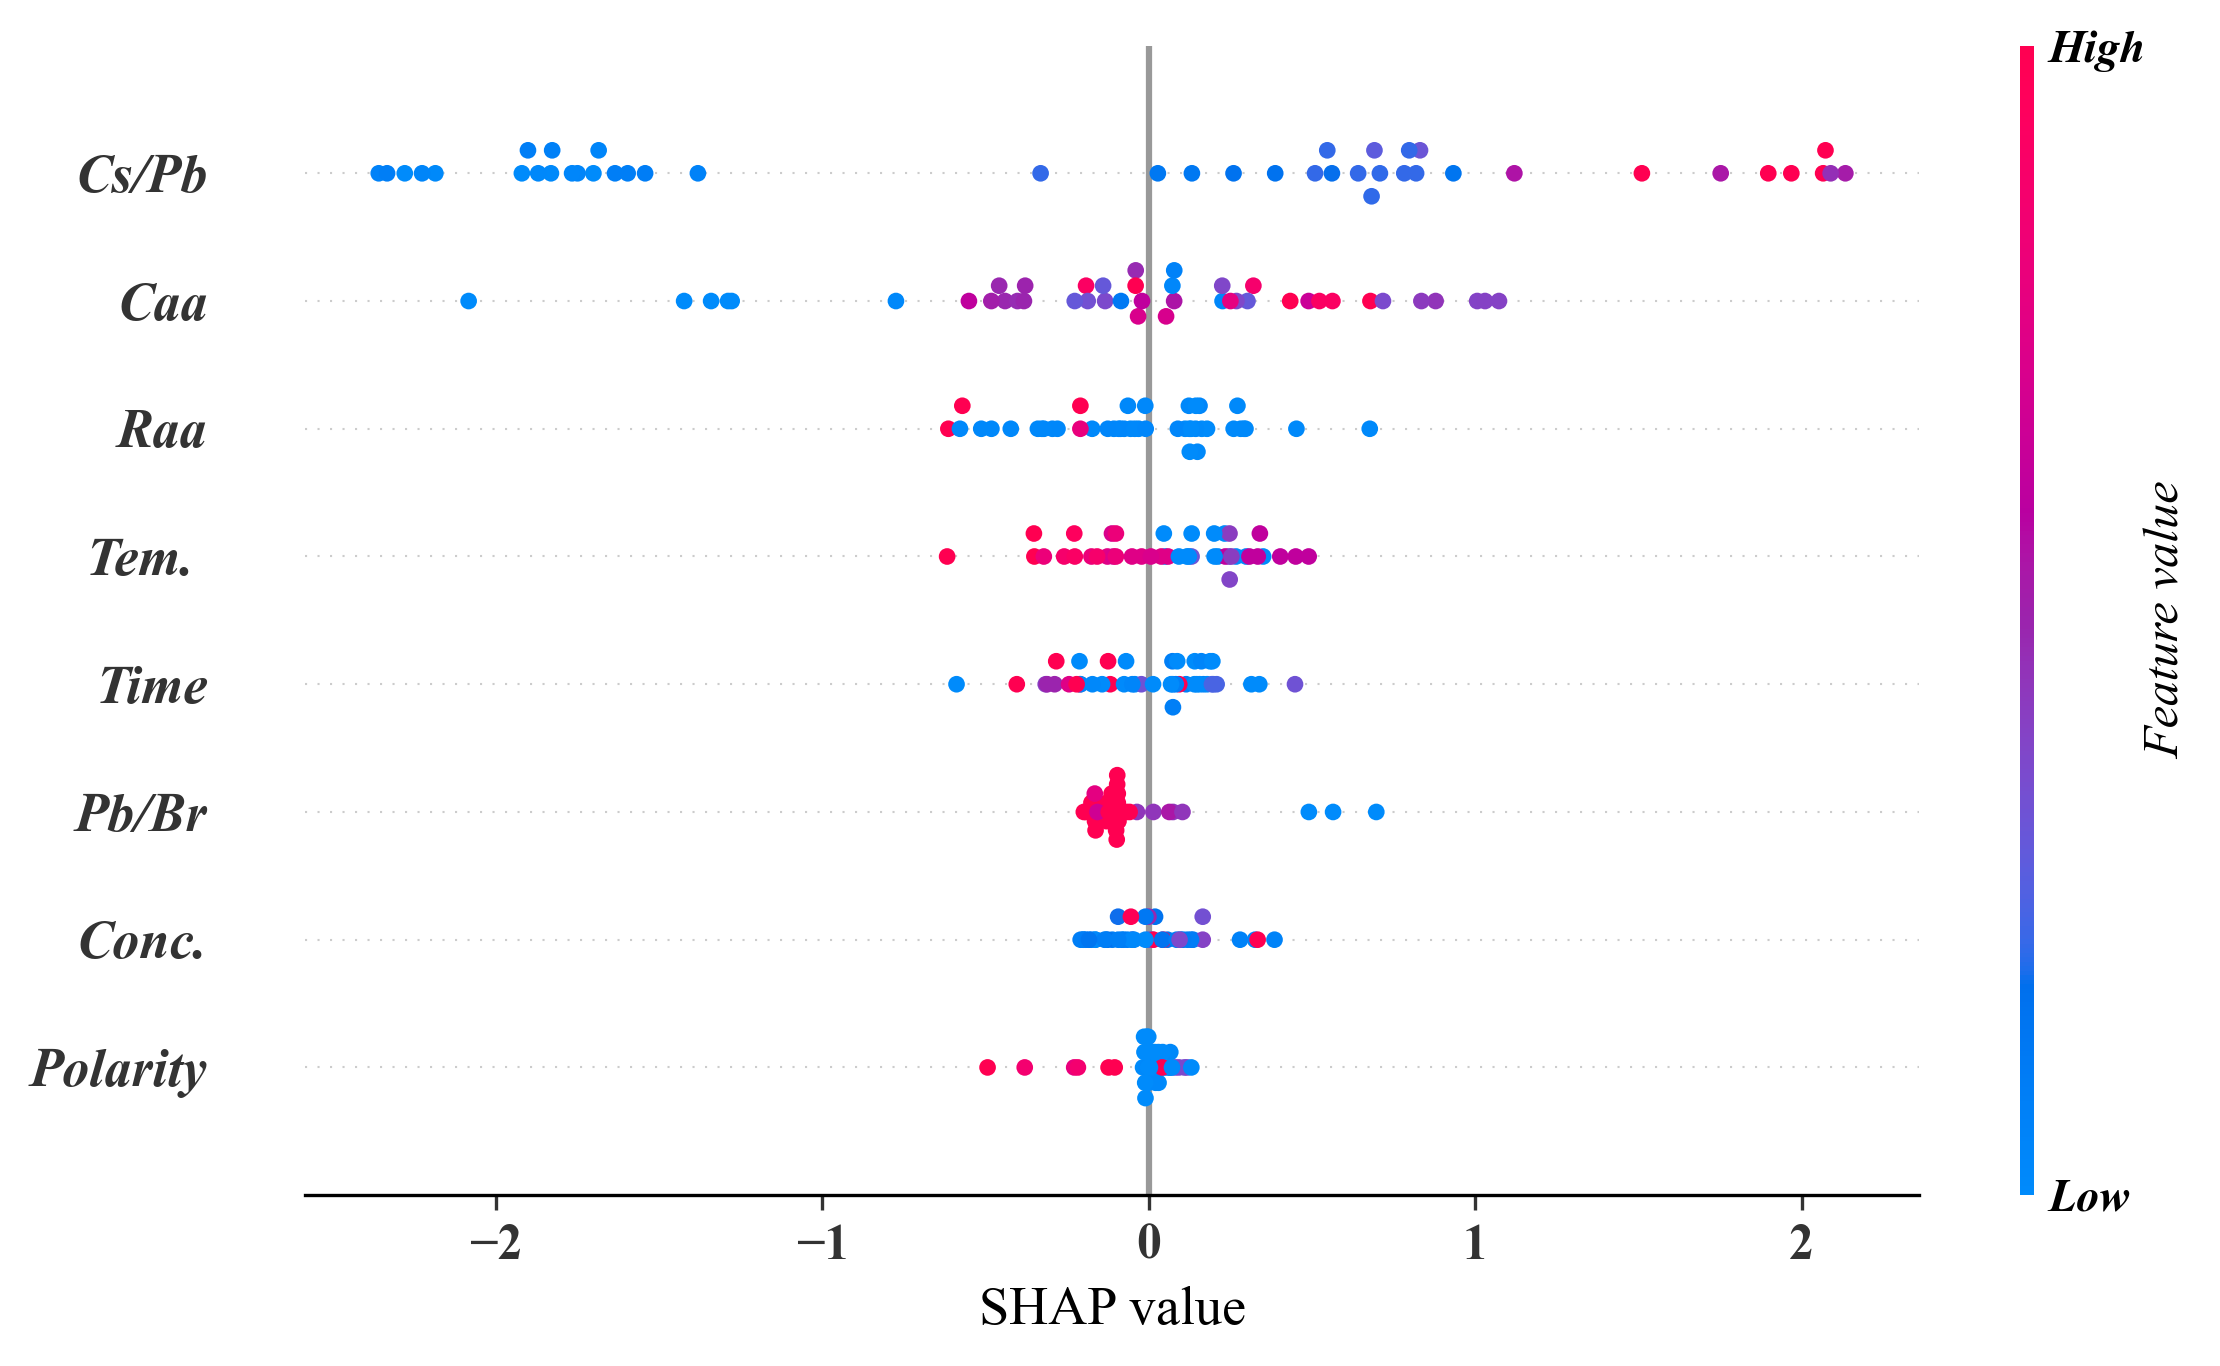

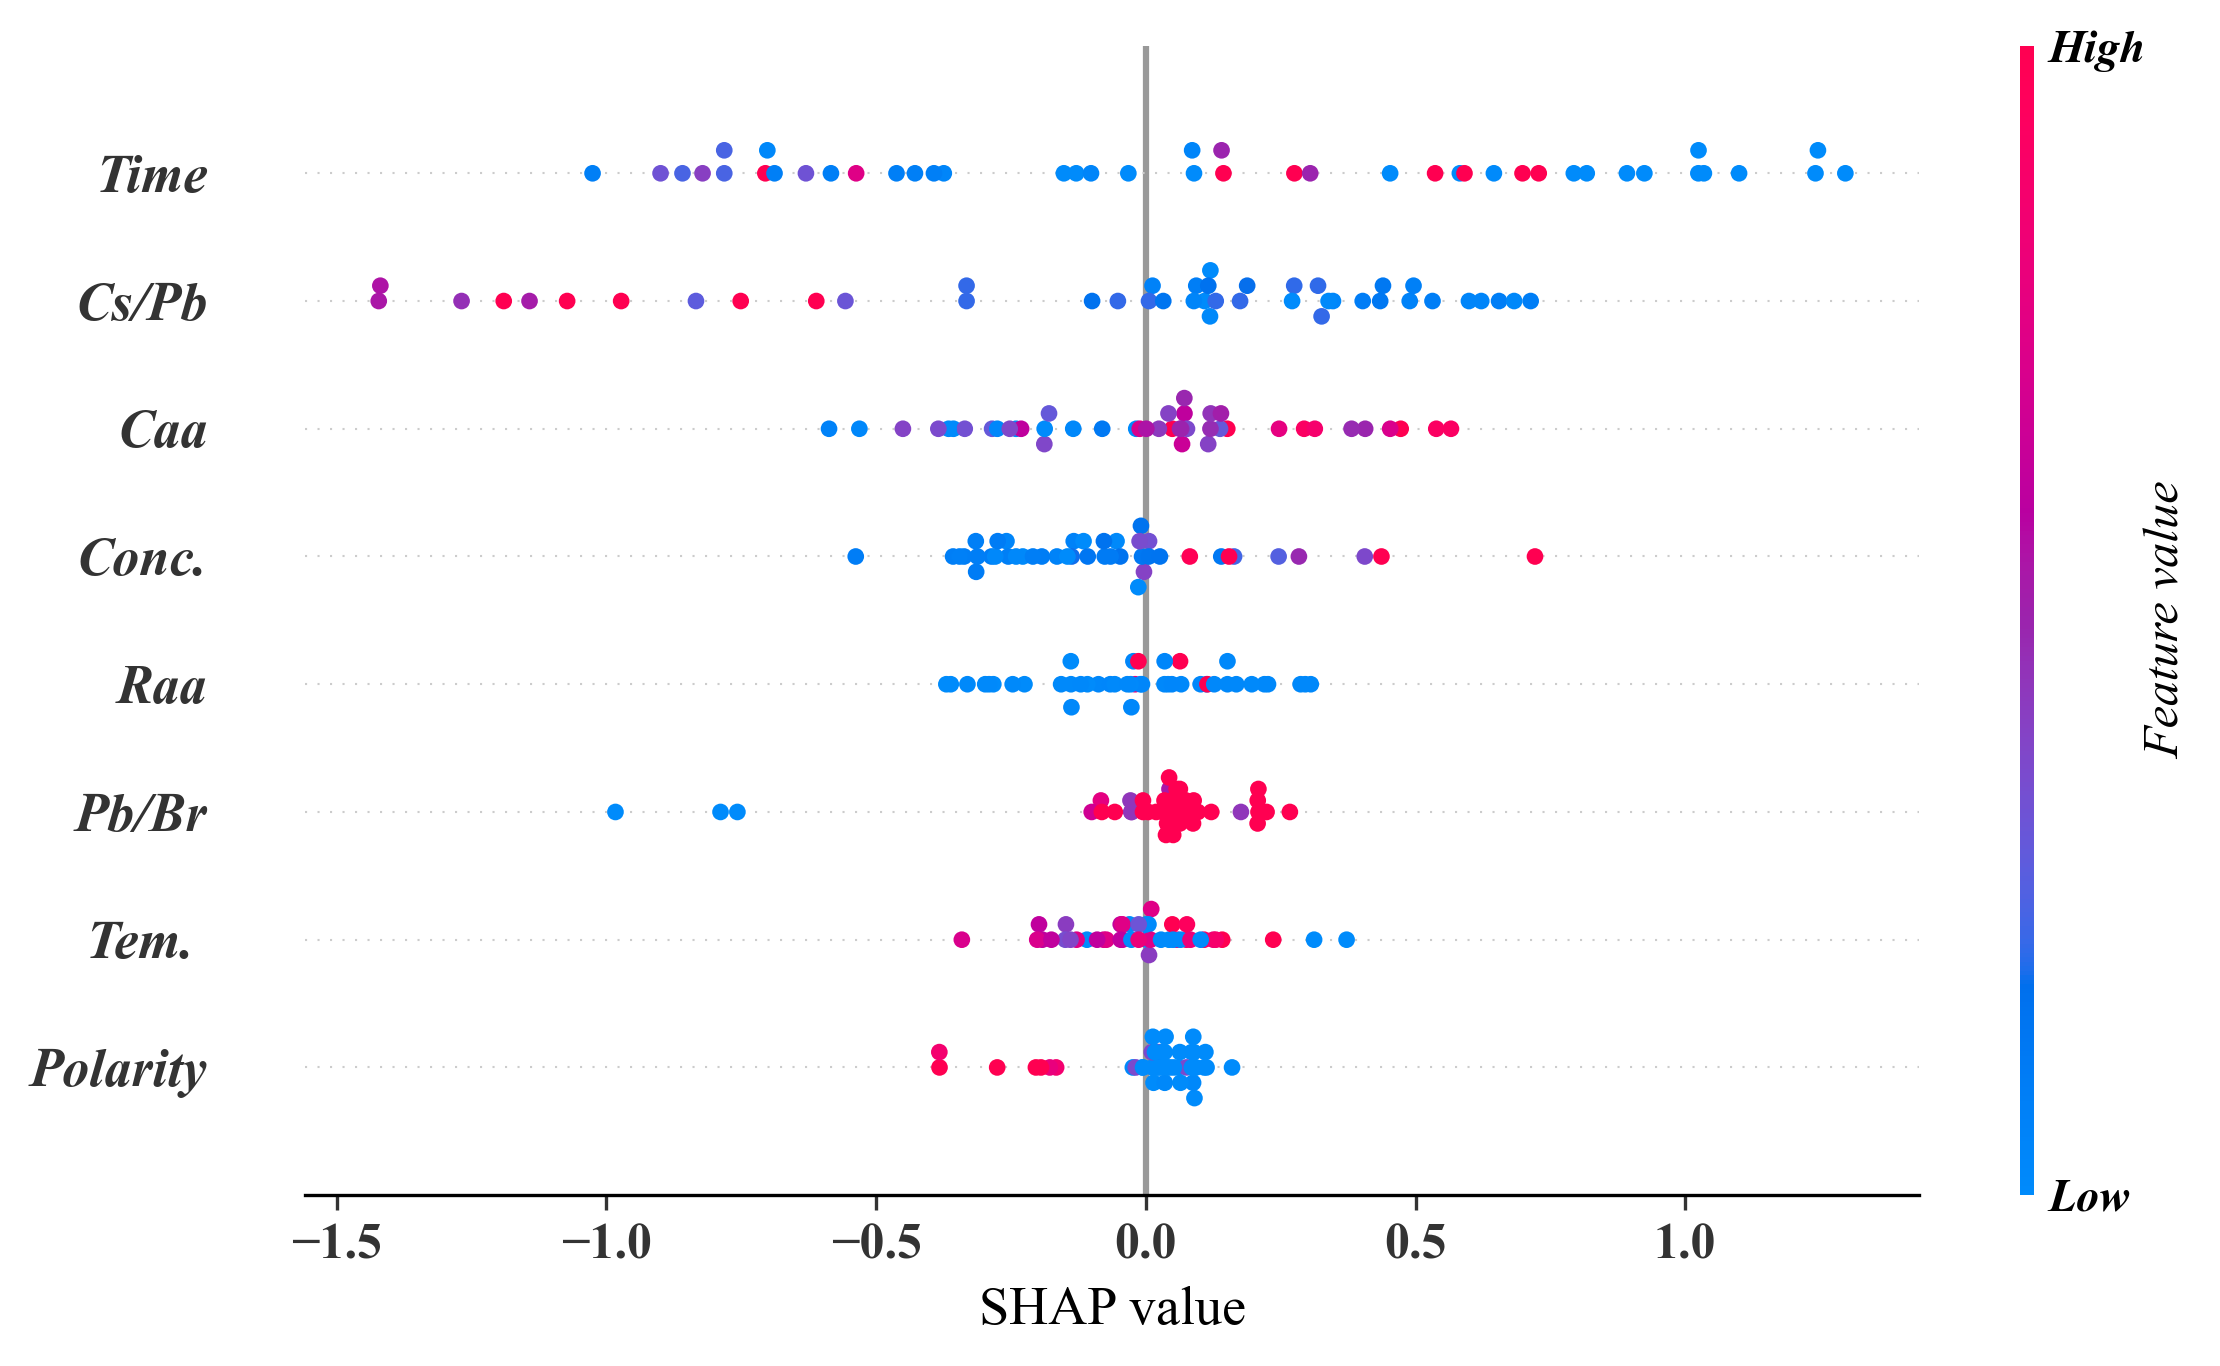

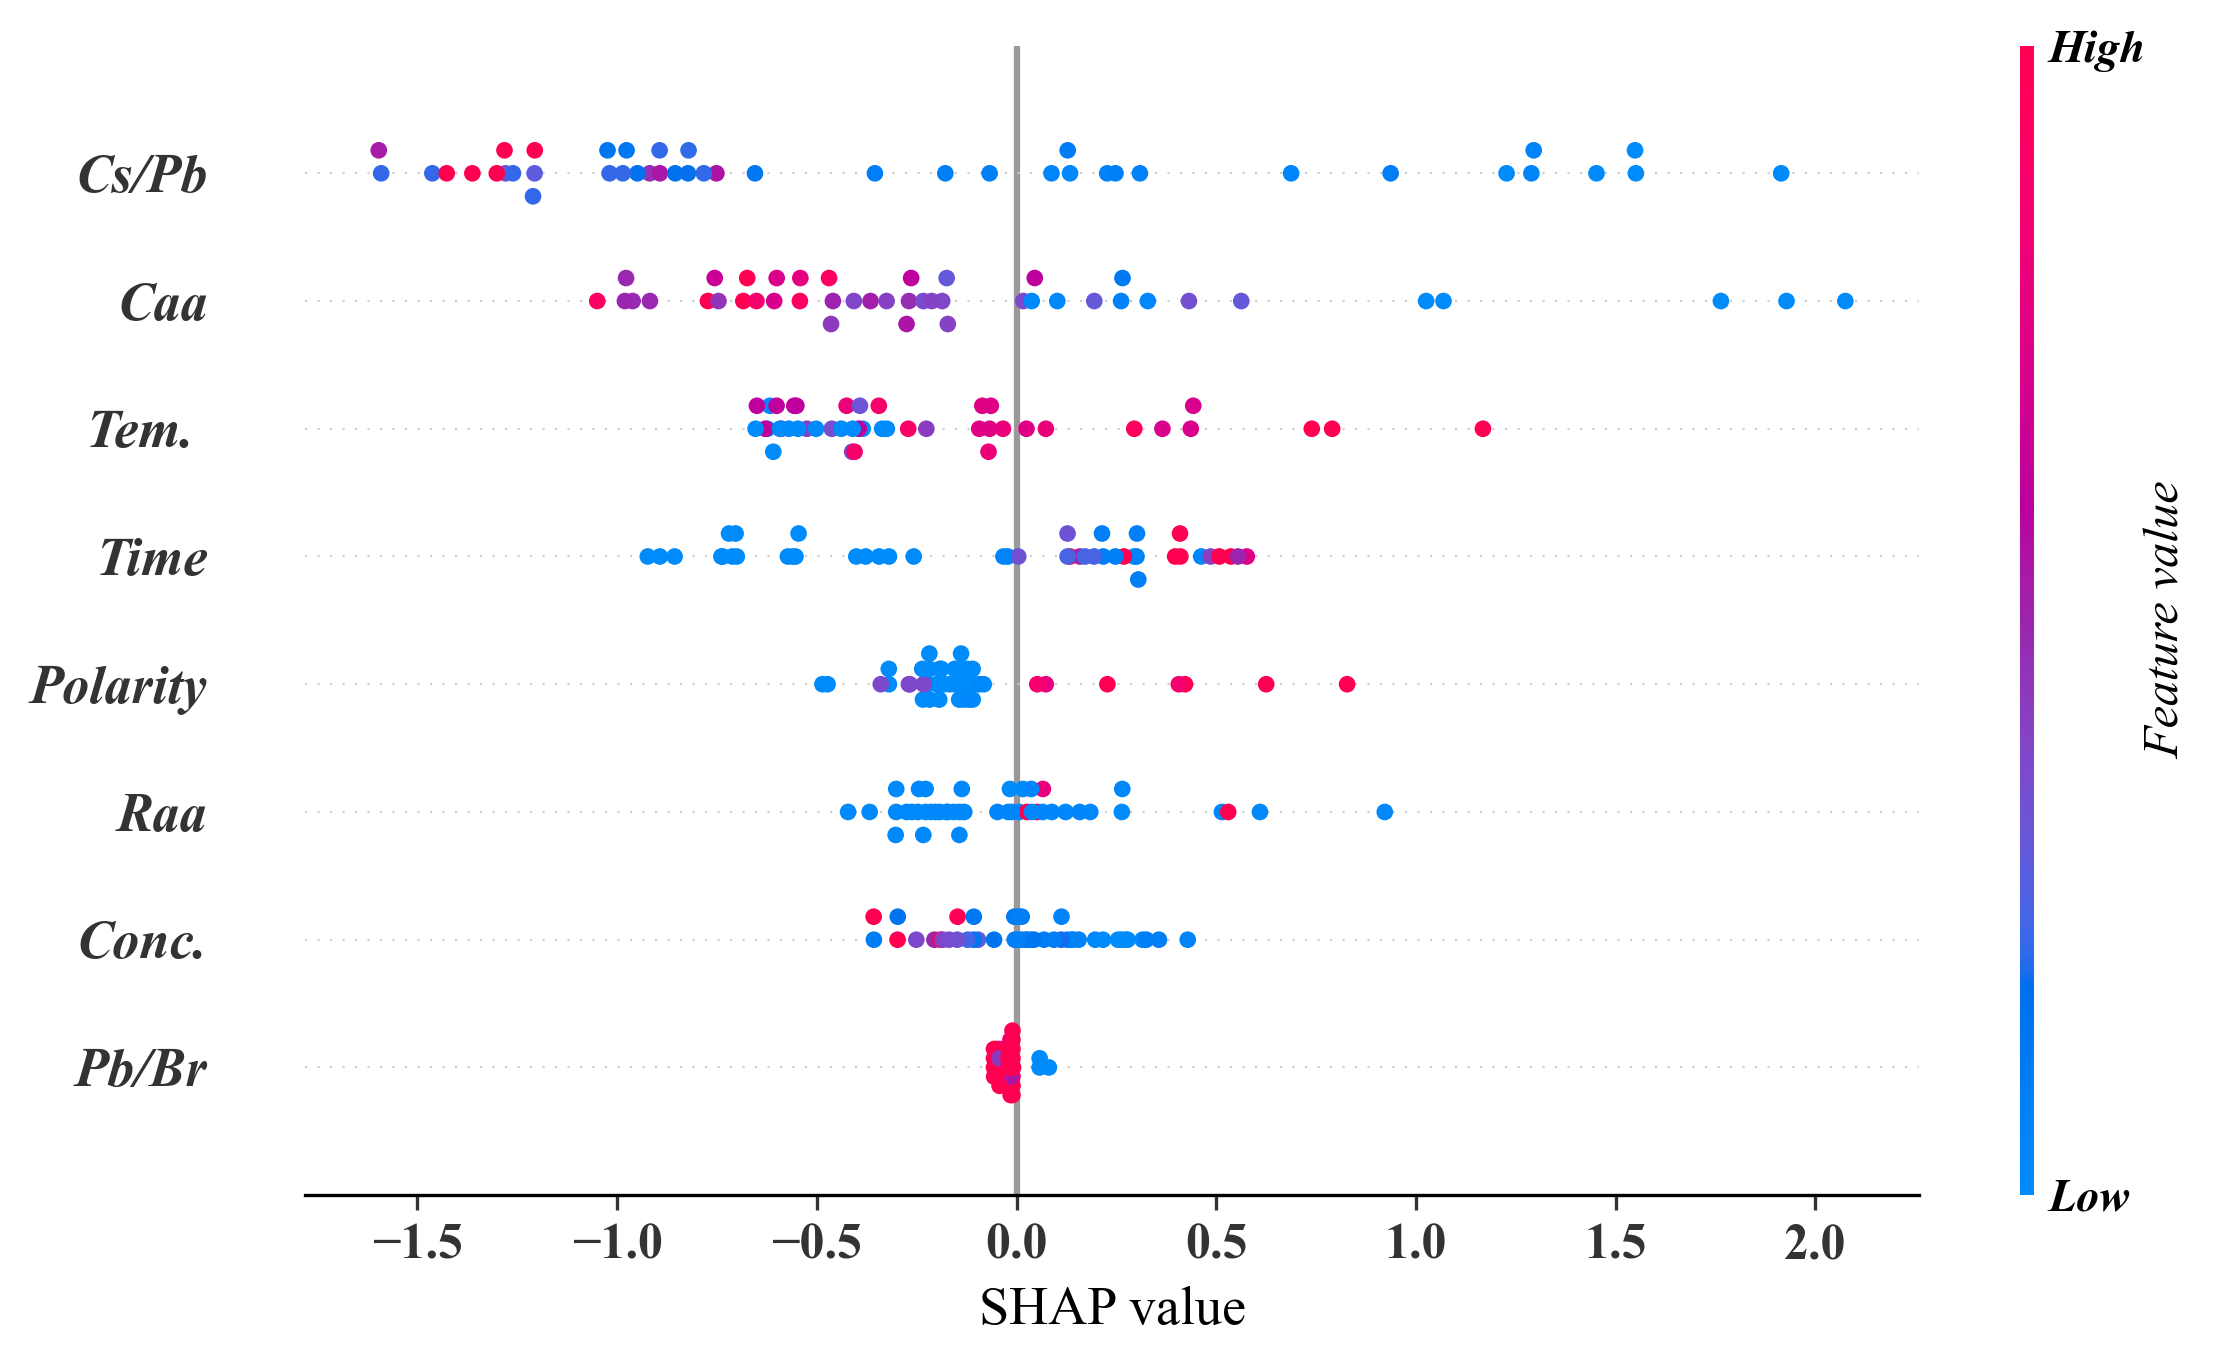

In [59]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties


mpl.rcParams['font.family'] = 'Times New Roman'

mpl.rcParams['font.size'] = 12  

mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.style'] = 'italic'

import shap

explainer = shap.TreeExplainer(bst)


shap_values = explainer.shap_values(X_test)


font_normal = FontProperties()
font_normal.set_style('normal') 


num_classes = len(label_encoder.classes_)
for i in range(num_classes):
    plt.figure(figsize=(10, 6), dpi=300)
    shap.summary_plot(shap_values[i], X_test, feature_names=data.columns[:-1], plot_type="dot", show=False)
    
    
    plt.gca().tick_params(axis='x', labelsize=12)  
    for label in plt.gca().get_xticklabels():
        label.set_fontproperties(font_normal)
    plt.xlabel('SHAP value', fontdict={'fontstyle':'normal'})
    
    plt.show()

In [68]:
#Validation
validation_data = pd.read_excel(r'data')

validation_data.replace(' ', np.nan, inplace=True)  
validation_data.dropna(inplace=True)  


X_validation = validation_data.iloc[:, :-1]
y_validation = validation_data.iloc[:, -1]


X_validation_scaled = scaler.transform(X_validation)  
y_validation_encoded = label_encoder.transform(y_validation)


dvalidation = xgb.DMatrix(X_validation_scaled, label=y_validation_encoded)


validation_preds = bst.predict(dvalidation)
validation_preds = validation_preds.reshape(-1, len(set(y_encoded)))
validation_predicted_classes = np.argmax(validation_preds, axis=1)


validation_accuracy = accuracy_score(y_validation_encoded, validation_predicted_classes)
print(f'Validation Accuracy: {validation_accuracy:.4f}')

Validation Accuracy: 0.8000


In [15]:

preds_proba = bst.predict(dvalidation)
predicted_classes_indices = np.argmax(preds_proba, axis=1)  


predicted_labels = label_encoder.inverse_transform(predicted_classes_indices)


print(predicted_labels)

[2 2 2 0 0 2 1 1 1 0]
